Testing a ship with a single system

In [4]:
# add location to path and complete necessary class imports
import sys
sys.path.append('..')

from shipClass.System import System
from shipClass.SensedComp import SensedComp
from shipClass.Ship import Ship

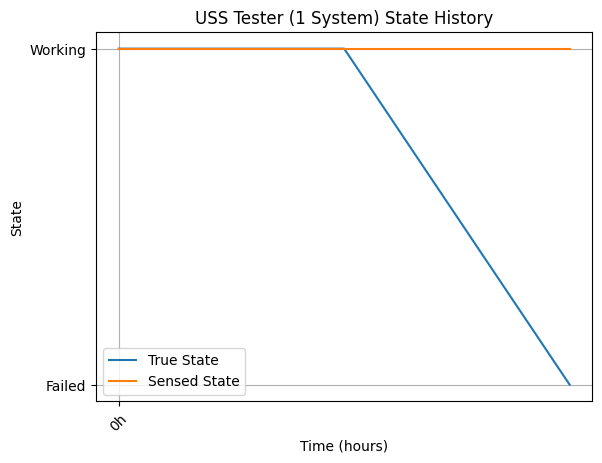

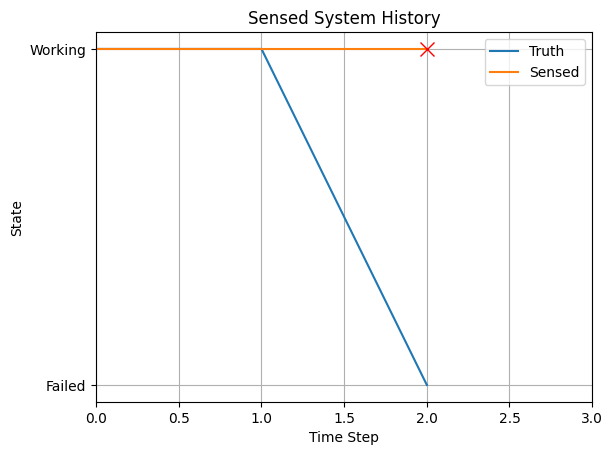

In [5]:
# initialize three default sensed components 
    # ( 2 states - 0:failed and 1:working )
sensed_comps = [SensedComp() for _ in range(3)]
sensed_comps[0].name = "SensedComp1"
sensed_comps[1].name = "SensedComp2"
sensed_comps[2].name = "SensedComp3"

# add the sensed components to a system
sys1 = System("Test System 1", sensed_comps)

# add the system to a ship
ship1 = Ship("USS Tester (1 System)", [sys1])

# simulate the ship until it fails
i=0
while ship1.state != 0:
    ship1.simulate(1)  # Simulate for 1 hour
    i += 1

# plot the simulation history of the ship and the system for comparison
ship1.plotHistory()
sys1.plotHistory()

In [6]:
# create a system with 4 sensed components (2 in parallel, 2 in series)
sys2_comps = [SensedComp() for _ in range(4)]
sys2 = System("Test System 2", sys2_comps, parallels=[(2,3)])

sys3_comps = [SensedComp() for _ in range(6)]
sys3 = System("Test System 3", sys3_comps, parallels=[(2,3), (4,5)])

# add the systems to a ship
ship2 = Ship("USS Tester (2 Systems)", [sys2, sys3])

# simulate the ship until it fails
i=0
while ship2.state != 0:
    ship2.simulate(1)  # Simulate for 1 hour
    i += 1

# plot the simulation history of the ship and the systems for comparison
# ship2.plotHistory()
ship2.printHistory2Excel("testResults/ship_test.xlsx")